In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import pandas as pd
import seaborn as sn
import plot_confusion_matrix

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
X_train, X_test, y_train, y_test = train_test_split(raw_tweets, y, test_size=0.2, random_state=42)

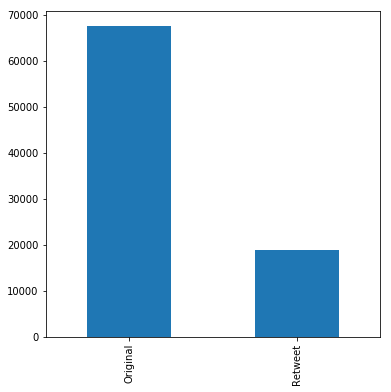

In [4]:
tweetsdf['Tweet'].str.startswith('RT').value_counts().rename({True: 'Retweet', False: 'Original'}).plot.bar(figsize=(6, 6))
plt.show()

In [5]:
handlesdf.head()

,Party,Name,Handle,AvatarURL
0,Democrat,US Rep. Darren Soto,RepDarrenSoto,https://pbs.twimg.com/profile_images/824454906...
1,Democrat,Rep. Jacky Rosen,RepJackyRosen,https://pbs.twimg.com/profile_images/837772241...
2,Democrat,US Rep. Al Lawson Jr,RepAlLawsonJr,https://pbs.twimg.com/profile_images/818493713...
3,Democrat,Adriano Espaillat,RepEspaillat,https://pbs.twimg.com/profile_images/827580972...
4,Democrat,US Rep. Darren Soto,RepDarrenSoto,https://pbs.twimg.com/profile_images/824454906...


In [74]:
parties.value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

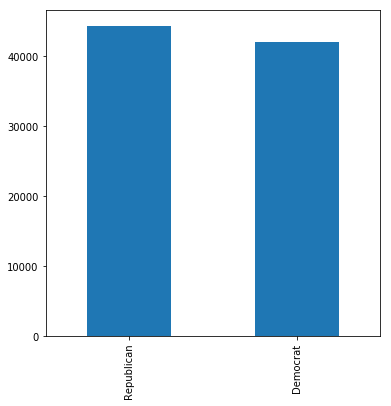

In [6]:
parties.value_counts().plot.bar(figsize=(6, 6))
plt.show()

In [7]:
model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [8]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [9]:
# Results for made up data
docs_new = ['God bless the USA', 'Medicare for all', 'Cut taxes', 'We need an energy independent America']
predicted = model.predict(docs_new)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, categories[int(category)]))

'God bless the USA' => Republican
'Medicare for all' => Democrat
'Cut taxes' => Republican
'We need an energy independent America' => Democrat


In [10]:
pred = model.predict(X_test)

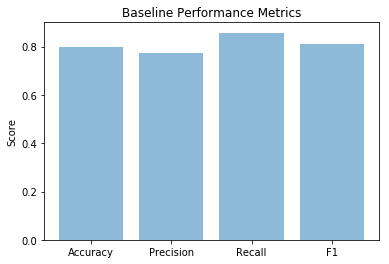

[0.7986352070321536,
 0.7716099959033184,
 0.8575005690871842,
 0.8122911051212938]

In [11]:
objects = ('Accuracy', 'Precision', 'Recall', 'F1')
y_pos = np.arange(len(objects))
performance = [accuracy_score(y_test, pred), 
               precision_score(y_test, pred), 
               recall_score(y_test, pred), 
               f1_score(y_test, pred)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Baseline Performance Metrics')

plt.show()
performance

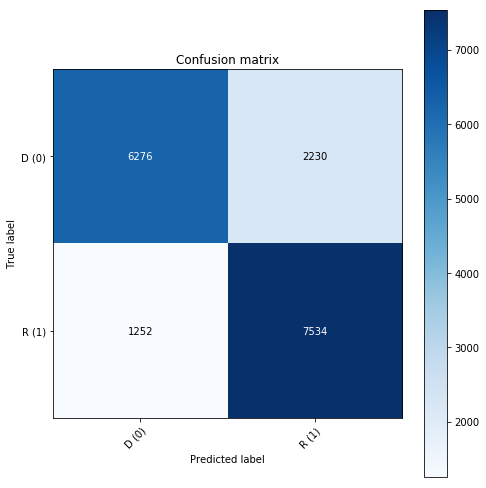

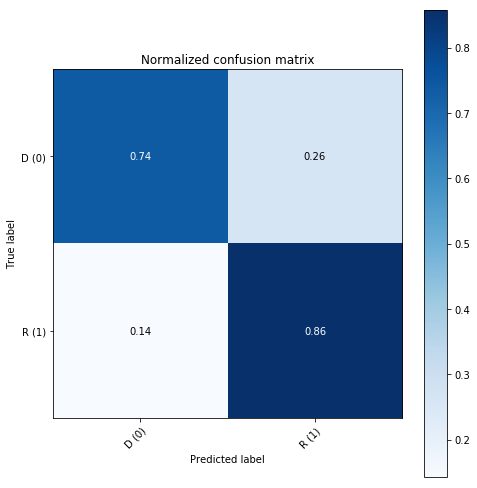

In [73]:
plt.rcParams["figure.figsize"] = (7,7)
classes=np.array(['D (0)', 'R (1)'])
plot_confusion_matrix.plot_confusion_matrix(y_test.astype(int), pred.astype(int), 
                                            classes=classes,
                                            title='Confusion matrix')
plt.show()
plot_confusion_matrix.plot_confusion_matrix(y_test.astype(int), pred.astype(int), 
                                            classes=classes, 
                                            normalize=True,
                                            title='Normalized confusion matrix')
plt.show()